In [1]:
import os
from pathlib import Path

import numpy as np
import librosa
import librosa.display
from scipy.fft import fft, fftfreq
from scipy.signal.windows import hann
import matplotlib.pyplot as plt

In [2]:
data_dir = Path(os.getcwd()).parent / 'data'
x_path = data_dir / 'in2.wav'
x_wav, sr = librosa.load(x_path, sr = 16000)
x_wav = x_wav[2000:20000]

N_FFT = 1024
H = N_FFT // 4
T = 1/sr

time_max = N_FFT / sr * 1000 # [ms]
time = np.linspace(0, time_max, num=N_FFT)
freq = fftfreq(N_FFT, T)[1:N_FFT//2]

(-899.95, 18898.95, -0.15409393310546876, 0.23084564208984376)

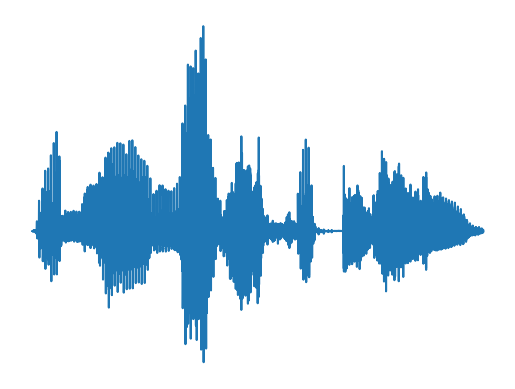

In [3]:
plt.plot(x_wav)
plt.axis('off')

(-76.75, 1611.75, -0.2, 1.1)

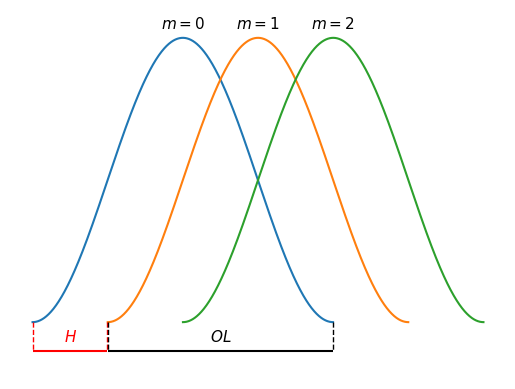

In [4]:
hann_window = hann(N_FFT)

plt.plot(range(0,N_FFT) , hann_window)
plt.annotate(r'$m=0$', ha='center',va='center', xy = (N_FFT//2, 1.05), fontsize=11)
plt.plot(range(H,N_FFT+H), hann_window)
plt.annotate(r'$m=1$', ha='center',va='center', xy = (N_FFT//2+H, 1.05), fontsize=11)
plt.plot(range(2*H,N_FFT+2*H), hann_window)
plt.annotate(r'$m=2$', ha='center',va='center', xy = (N_FFT//2+2*H, 1.05), fontsize=11)

plt.vlines(0, ymin=0, ymax=-0.1, linewidth=1, color='red', linestyle='--')
plt.vlines(H-2, ymin=0, ymax=-0.1, linewidth=1, color='red', linestyle='--')
plt.hlines(-0.1, xmin=0, xmax=H-2, linewidth=1.5, color='red')
plt.annotate(r'$H$', ha='center',va='center', xy = (H/2,-0.05), fontsize=11, color='red')
plt.vlines(H+2, ymin=0, ymax=-0.1, linewidth=1, color='black', linestyle='--')
plt.vlines(N_FFT, ymin=0, ymax=-0.1, linewidth=1, color='black', linestyle='--')
plt.hlines(-0.1, xmin=H+2, xmax=N_FFT, linewidth=1.5, color='black')
plt.annotate(r'$OL$', ha='center',va='center', xy = ((H + N_FFT)/2, -0.05), fontsize=11, color='black')
plt.ylim([-0.2,1.1])
plt.axis('off')

(-51.150000000000006, 1074.15, -0.00895192900777464, 0.01025174064909128)

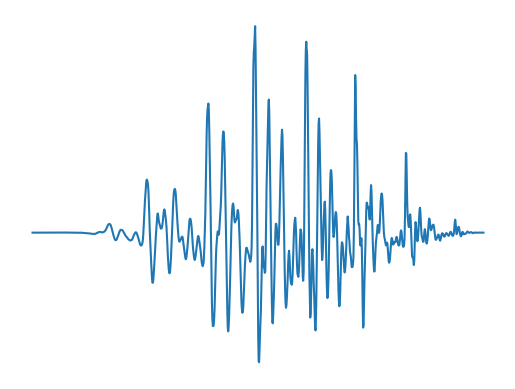

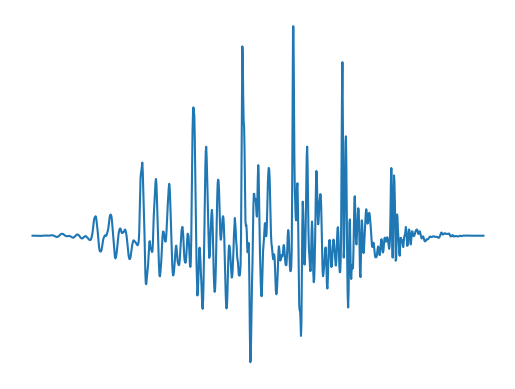

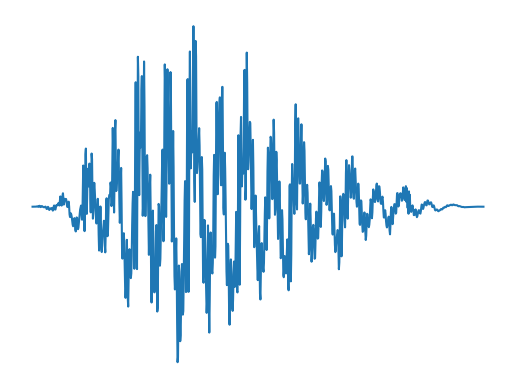

In [5]:
x_wav_seg0 = x_wav[:N_FFT]*hann_window
x_wav_seg1 = x_wav[H:N_FFT+H]*hann_window
x_wav_seg_last = x_wav[-N_FFT:]*hann_window

plt.figure()
plt.plot(x_wav_seg0)
plt.axis('off')
plt.figure()
plt.plot(x_wav_seg1)
plt.axis('off')
plt.figure()
plt.plot(x_wav_seg_last)
plt.axis('off')


(-25.5, 535.5, -9.894859765949536e-05, 0.002086431450388599)

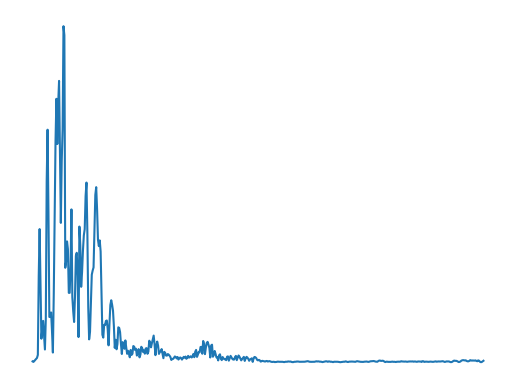

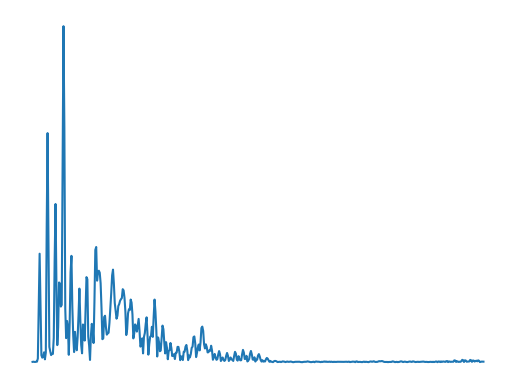

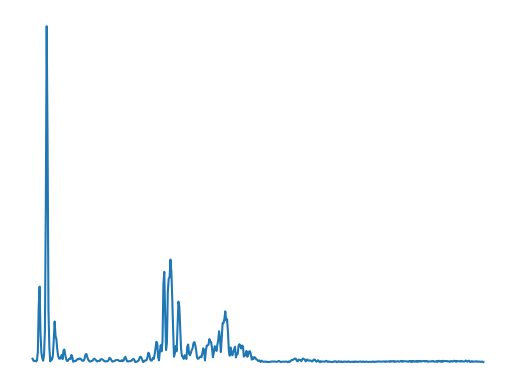

In [6]:
x_fft_seg0 = np.abs(fft(x_wav_seg0))
x_fft_seg0 = 2.0/N_FFT * x_fft_seg0[1:N_FFT//2]
x_fft_seg1 = np.abs(fft(x_wav_seg1))
x_fft_seg1 = 2.0/N_FFT * x_fft_seg1[1:N_FFT//2]
x_fft_seg_last = np.abs(fft(x_wav_seg_last))
x_fft_seg_last = 2.0/N_FFT * x_fft_seg_last[1:N_FFT//2]

plt.figure()
plt.plot(x_fft_seg0)
plt.axis('off')
plt.figure()
plt.plot(x_fft_seg1)
plt.axis('off')
plt.figure()
plt.plot(x_fft_seg_last)
plt.axis('off')

d:\GitHub_Portfolio\SpeechReconstruction\env\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


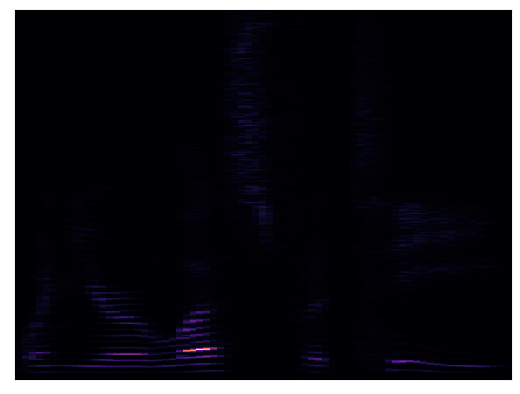

In [7]:
x_stft = librosa.stft(y=x_wav, n_fft=N_FFT, hop_length=H)
librosa.display.specshow(np.abs(x_stft), n_fft=N_FFT)

Text(0.5, 0, '(b)')

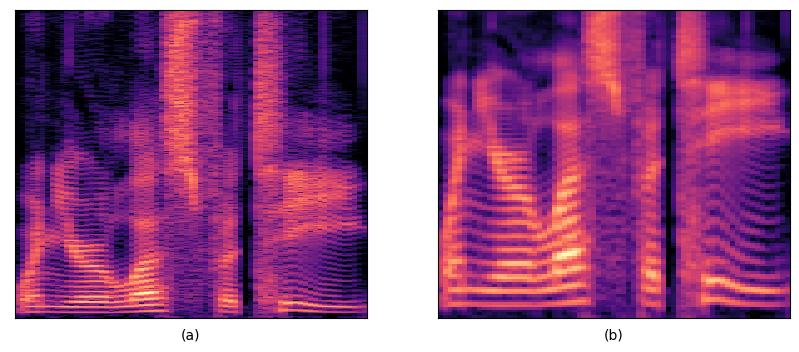

In [24]:
def to_db(spectrogram, power_spectr = False, min_db = -80):
    scale = 10 if power_spectr else 20
    spec_max = np.max(spectrogram)
    spec_db = np.clip(scale * np.log10(spectrogram / spec_max + 1e-12), a_min=min_db, a_max=0)
    return spec_db

melfb = librosa.filters.mel(sr = sr, 
                            n_fft = N_FFT, 
                            n_mels = 120)
x_mel = np.dot(melfb, np.abs(x_stft))
# x_mel = librosa.feature.melspectrogram(S=np.abs(x_stft))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
librosa.display.specshow(to_db(np.abs(x_stft)), n_fft=N_FFT)
plt.xlabel('(a)')
plt.subplot(1,2,2)
librosa.display.specshow(to_db(np.abs(x_mel)), n_fft=N_FFT)
plt.xlabel('(b)')